# Librerias

In [3]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Descargar los recursos de NLTK y cargar los datos

In [4]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Definir las stopwords y el lematizador

In [5]:
stop_words = set(stopwords.words('spanish'))
lematizador = WordNetLemmatizer()

# Función de tokenización y limpieza

In [6]:
def tokenizar_y_limpiar(texto):
    texto = texto.lower()
    palabras = word_tokenize(texto)
    palabras = [lematizador.lemmatize(palabra) for palabra in palabras if palabra.isalnum() and palabra not in stop_words]
    return palabras


# Cargar los datos

In [7]:
data = pd.read_excel('cat_345.xlsx')
y = data['sdg']

# Crear un pipeline con el vectorizador y el clasificador

In [8]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(tokenizer=tokenizar_y_limpiar, max_features=7500)),
    ('svm', SVC(C=10, class_weight=None, degree=2, gamma=1, kernel='rbf'))
])

# Dividir los datos

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data['Textos_espanol'], y, test_size=0.2, random_state=42, stratify=y)

# Entrenar el pipeline

In [10]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=7500,
                                 tokenizer=<function tokenizar_y_limpiar at 0x000001E282B8FC10>)),
                ('svm', SVC(C=10, degree=2, gamma=1))])

# Predecir y evaluar

In [11]:
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 98.17%

Classification Report:
               precision    recall  f1-score   support

           3       0.98      0.97      0.98       200
           4       0.98      0.98      0.98       200
           5       0.98      0.98      0.98       200

    accuracy                           0.98       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.98      0.98      0.98       600



# Visualizar la matriz de confusión

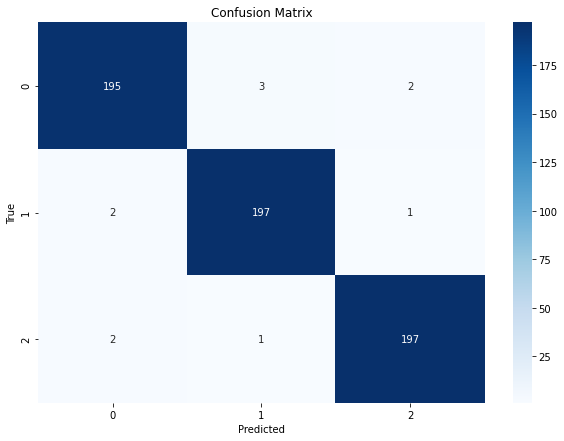

In [12]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='g', cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Guardar el pipeline

In [13]:
joblib.dump(pipeline, 'text_classification_pipeline.joblib')

['text_classification_pipeline.joblib']

# Usar el pipeline

In [14]:
import pandas as pd
from joblib import load

# Cargar el pipeline
pipeline = load('text_classification_pipeline.joblib')

# Cargar los nuevos datos sin etiquetar
data_sin_etiqueta = pd.read_excel('SinEtiquetatest_cat_345.xlsx')

# Suponiendo que la columna con el texto a clasificar se llama 'Textos_espanol'
# Realizar predicciones
predicciones = pipeline.predict(data_sin_etiqueta['Textos_espanol'])

# Añadir las predicciones al dataframe en la columna 'sdg'
data_sin_etiqueta['sdg'] = predicciones

# Guardar el dataframe con las nuevas predicciones en el mismo archivo Excel
data_sin_etiqueta.to_excel('SinEtiquetatest_cat_345.xlsx', index=False)
